# MCIS6273 Data Mining (Prof. Maull) / Fall 2021 / HW1 
## [ANSWER NOTEBOOK]

**This assignment is worth up to 20 POINTS to your grade total if you complete it on time.**

| Points <br/>Possible | Due Date | Time Commitment <br/>(estimated) |
|:---------------:|:--------:|:---------------:|
| 20 | Monday, Sep 20 @ Midnight | _up to_ 20 hours |


* **GRADING:** Grading will be aligned with the completeness of the objectives.

* **INDEPENDENT WORK:** Copying, cheating, plagiarism  and academic dishonesty _are not tolerated_ by University or course policy.  Please see the syllabus for the full departmental and University statement on the academic code of honor.

## OBJECTIVES
* Explore the statistical properties of images and build a cloudiness detector

* Gain more practice with the Exploratory Data Analysis (EDA) and statistical functions in Pandas using WWII enlistment data

## WHAT TO TURN IN
You are being encouraged to turn the assignment in using the provided
Jupyter Notebook.  To do so, make a directory in your Lab environment called
`homework/hw1`.   Put all of your files in that directory. 

Then zip that directory,
rename it with your name as the first part of the filename (e.g. `maull_hw1_files.tar.gz`), then
download it to your local machine, then upload the `.tar.gz` to Blackboard.

If you do not know how to do this, please ask, or visit one of the many tutorials out there
on the basics of using in Linux.

If you choose not to use the provided notebook, you will still need to turn in a
`.ipynb` Jupyter Notebook and corresponding files according to the instructions in
this homework.

## ASSIGNMENT TASKS
### (50%) Explore the statistical properties of images and build a cloudiness detector 

We take for granted our biological capabilities of vision 
    and perception.  Indeed, human vision, while not the most
precise or even most capable of Earth species is quite good
and when paired with the perceptual capabilities of our brain,
is an incredible mechanism.

The perception and understanding of the words on the screen or
page you read this assignment right now, is indeed a feat of 
great coordination, between your eyes, brain and the connective
tissues of the nervous system.

Machine vision, on the other hand, is not an easy task.  Vigorous
research over the last 40 years is now bearing fruit, upon which 
self-driving cars
and intelligent object detectors are being integrated into 
our daily lives, in some cases when we are least aware of it and
in others where we might not like them to be (i.e. facial recognition 
in retail contexts).

As we move into statistical skill building in the data mining
context, images offer a rich area to explore, and we will
do so in this part of the assignment by building a rudimentary
"cloudiness detector".

You know that determining whether it is a cloudy, partly or sunny
day is largely a trivial task, even for the young ones among us --
most children can accurately determine whether it is sunny by age
3, but this task, as you will see, may not be so easy for our 
digital machines.

This part of the assignment will invoke a few new tools, 

* we will use [numpy](https://numpy.org/) to manipulate data arrays easily and transform them;
* we will use [pandas](https://pandas.pydata.org/) to convert numpy data arrays back and forth and provide a richer representation of the data, as well as
  invoke some of the built-in statistical and graphing tools;
* we will use [matplotlib](https://matplotlib.org/) to manipulate images and image data.


### Image representation
As you likely already know images are represented in a computer
as an $n \times m$ array (matrix) consisting of a monochromatic, greyscale
or color representation.  Each value in the array represents
a _pixel_.  Consider the $10 \times 10$ color RGB image, where
each entry in the matrix is represented as a 3-tuple RGB
value where each value in the tuple is in the range $0 - 255$. Here
is a concrete example:

$$
I_{m,n} = 
\begin{pmatrix}
(215,191,136) & \cdots & (232,94,254) \\
(151,195,183) & \cdots & (210,36,220) \\
(141,225,155) & \cdots & (48,31,65) \\
\vdots   & \ddots & \vdots  \\
(210,23,125) & \cdots & (151,54,128) \\
(84,165,239) & \cdots & (46,176,84) \\
\end{pmatrix}
$$

You will see this as an $n \times m \times 3$ array.
Put a thumbtack in this representation as it will be used 
heavily in this part of the assignment.

## Tools you'll need
You will need to load and display images in this 
assignment.


### `matplotlib.image.mpimg.imread()`
To load an image, you can use the [`matplotlib.image.mpimg.imread()`](https://matplotlib.org/stable/api/image_api.html?highlight=imread#matplotlib.image.imread) function
which will load the image into a numpy array as represented above.

### `matplotlib.pyplot.imshow()`
To display an image in your notebook, simply write:

```
# load an image using imread()
rgb_img = matplotlib.image.mpimg.imread()

# show the image in the notebook
matplotlib.pyplot.imshow(rgb_img)
```

### `matplotlib.colors.rgb_to_hsv()`
While working in RGB color space can be useful, there is another
color space that affords us some advantages to quickly get at
some of the image properties we're most interested in for
analysis.  The [`matplotlib.colors.rgb_to_hsv()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.rgb_to_hsv.html) function will
convert our RGB image into an HSV equivalent.  HSV stands for
Hue, Saturation, Value and it allows us to more easily identify
colors and their intensities in an image.  You can read more 
about that in these links : 

* Stack Exchange: [Why do we use the HSV colour space so often in vision and image processing?](https://dsp.stackexchange.com/questions/2687/why-do-we-use-the-hsv-colour-space-so-often-in-vision-and-image-processing)
* Hue, Value, Saturation at [leighcotnoir.com](http://learn.leighcotnoir.com/artspeak/elements-color/hue-value-saturation/)
* What are Color Models? at [wigglepixel.nl](https://www.wigglepixel.nl/en/blog/what-are-color-models/)

Here is an example:
```
rgb_img = matplotlib.image.mpimg.imread()

# convert to an hsv representation
rgb_hsv = matplotlib.colors.rgb_to_hsv(rgb_img / 255.)

# important, don't forget the division by 255 to normalize all the values!!!

```

### `numpy.compress()` and `flatten()`
In one part of the assignment you will be asked to convert
the HSV image to a Pandas DataFrame.  Doing this can be
done a number of ways, but one thing you will note is the
array of the image is 3 dimensions -- that is it has
a width, height and an HSV representation of the pixel
which is itself a tuple of 3 values (H,S,V).

See information about [`compress()`](https://numpy.org/doc/stable/reference/generated/numpy.compress.html),
and information about [`flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html), which are 
just one way to help you get the array reformed to 
fit into the DataFrame in the tasks below.

### `DataFrame.T`
Transposing a DataFrame is equivalent to a vector transpose.

Consider the column vector :

$$
V = \begin{bmatrix}
    1 \\
    3 \\
    6 \\
    5 \\
    9
    \end{bmatrix}
$$        

The transpose $V^T$ is a row vector:

$$
V^T = \begin{bmatrix} 
        1 & 3 & 6 & 5 & 9 
      \end{bmatrix}
$$ 

So if you have a DataFrame:
```python
df = pd.DataFrame([1, 3, 6, 5, 9], 
             columns=['values']
```

which gives:

\begin{center}
\begin{tabular}{lr}
\toprule
{} &  values \\
\midrule
0 &       1 \\
1 &       3 \\
2 &       6 \\
3 &       5 \\
4 &       9 \\
\bottomrule
\end{tabular}
\end{center}

then the transpose
```python
df.T 
``` 
will give:

\begin{center}
\begin{tabular}{lrrrrr}
\toprule
{} &  0 &  1 &  2 &  3 &  4 \\
\midrule
values &  1 &  3 &  6 &  5 &  9 \\
\bottomrule
\end{tabular}
\end{center}

## Na&iuml;ve Cloudiness Detection
Building a real cloud object detector is out of the scope
of this assignment, but we can actually build a pretty good one on
statistically analyzing the image, and looking for the blue
in the sky.  When you think of it, cloudiness is just a 
ratio of the blueness to non-blueness in the sky.  We might
also need to add some caveats to this detector -- namely, it 
isn't very good at detection if there are other things in
the image besides clouds (e.g. mountains, cars, etc.).  So
we'll assume that the images we'll analyze with it will all be 
images of the sky (camera pointed up) and not images of lanscapes
with sky or other types of objects with sky in them.

Looking at it mathematically, if we count all the blue
pixels in the image and assume the non-blue (non-sky) pixels
are clouds, we might come rather close to accomplishing 
what we want.  So if $p_{all}$ are all the pixels in 
the image and $p_{blue}$ are all the blue pixels
in our image then $p_{not\_blue} = p_{all} - p_{not\_blue}$, 
then cloudiness is given by

$$
C(p) = 1 - \frac{p_{blue}}{p_{all}}
$$

that is to say, the cloudiness is what's left of the pixels which
are not blue. This number will, of course, be between 0 and 1
and thus can be interpreted as a percentage "cloudiness", where
0 is a clear sky, and 1 is a fully cloudy sky.

Using this simple insight will allow you to develop the detector. 

You may structure your code however you like, but one hint 
you might consider is to build a function that takes an 
image file name and performs the necessary transforms to 
return cloudiness.

&#167;  Load image #1 (`img01.jpg`) into a variable and display it. Convert 
the image to HSV using the method described above and display the HSV version.

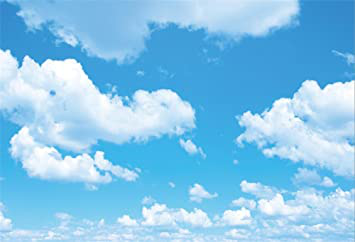

In [1]:
## ASSUME IMAGES ARE LOADED LOCALLY
from PIL import Image
Image.open("images/img01.jpg")

In [2]:
import matplotlib.image as mpimg
from matplotlib.colors import rgb_to_hsv

im = mpimg.imread("images/img01.jpg")
im_hsv = rgb_to_hsv(im / 255.0) 

# NOTE THE /255 IS NECESSARY TO NORMALIZE

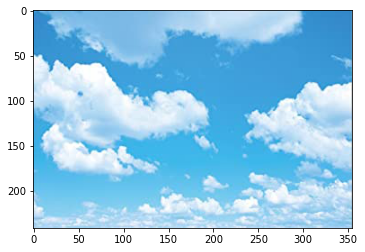

In [3]:
import matplotlib.pyplot as plt
plt.imshow(im)

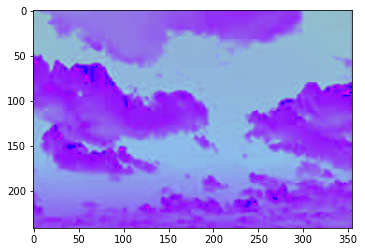

In [4]:
plt.imshow(im_hsv)

&#167;  Using the HSV image data (converted from RGB), make a Pandas DataFrame
which looks something like this when your done:
    
\begin{center}
\begin{tabular}{lrrr}
\toprule
{} &           H &         S &         V \\
\midrule
0 &  205.479452 &  0.618644 &  0.925490 \\
1 &  205.479452 &  0.613445 &  0.933333 \\
2 &  205.479452 &  0.610879 &  0.937255 \\
3 &  205.352113 &  0.617391 &  0.901961 \\
4 &  205.957447 &  0.646789 &  0.854902 \\
$\cdots$ & $\cdots$ &  $\cdots$   & $\cdots$ \\
85905 &  206.582278 &  0.316000 &  0.980392 \\
85906 &  206.582278 &  0.322449 &  0.960784 \\
85907 &  204.761905 &  0.272727 &  0.905882 \\
85908 &  204.761905 &  0.268085 &  0.921569 \\
85909 &  204.761905 &  0.294393 &  0.839216 \\
\bottomrule
\end{tabular}
\end{center}


NOTES: (a) Notice the H, S and V are the columnar values! (b) The H value may need to be rescaled by 360 if the native value coming from the transform has been normalized to between 0 and 1.  

In [5]:
import pandas as pd


# convert the image to dataframe
df = pd.DataFrame( [
    im_hsv.compress([True, False, False], axis=2).flatten(),
    im_hsv.compress([False, True, False], axis=2).flatten(),
    im_hsv.compress([False, False, True], axis=2).flatten()
], index=['H', 'S', 'V'])

# the transpose is necessary!
df = df.T

In [6]:
df

,H,S,V
0,0.570776,0.618644,0.925490
1,0.570776,0.613445,0.933333
2,0.570776,0.610879,0.937255
3,0.570423,0.617391,0.901961
4,0.572104,0.646789,0.854902
...,...,...,...
85905,0.573840,0.316000,0.980392
85906,0.573840,0.322449,0.960784
85907,0.568783,0.272727,0.905882
85908,0.568783,0.268085,0.921569


&#167;  Use the `DataFrame.hist()` method to produce a histogram
of the H, S and V values for `img01.jpg`.  Make sure the histograms
are in your notebook and answer the following questions:

* What do you observe about the H values in the histogram?(HINT: you might want to look at the dominant color type in an HSV tool online)
* What is interesting about the S values in contrast to H (ignore the axis scale in your answer)?

array([[<AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'S'}>],
       [<AxesSubplot:title={'center':'V'}>, <AxesSubplot:>]], dtype=object)

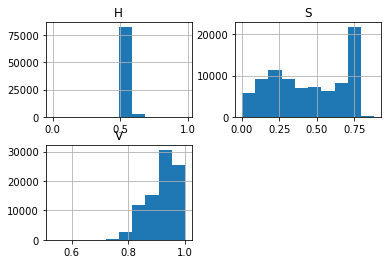

In [7]:
df.hist()

In [8]:
df.H = df.H*360 # we need to rescale

array([[<AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'S'}>],
       [<AxesSubplot:title={'center':'V'}>, <AxesSubplot:>]], dtype=object)

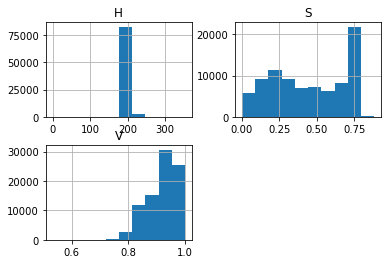

In [9]:
df.hist()

### ANSWERS

* H values are highly concentrated around a narrow range of values.
* S values are more broadly distrubuted

&#167;  Use the `DataFrame.describe()` method to produce the
descriptive statistics for the HSV data for `img07.jpg`.  
Answer the following:

* What is the mean and median H?
* What about max and min for H?
* What can you say about the standard deviation and how
  it relates to the values between the 25% and 75%-tile?
* Assuming a normal distribution, what is the expected
  H range for the 1st standard deviation?

In [10]:
df.H.describe()

count    85910.000000
mean       202.497603
std         12.593889
min          0.000000
25%        200.000000
50%        203.289474
75%        205.312500
max        353.333333
Name: H, dtype: float64

### ANSWERS
* **mean**=202.49, **median**=203.28
* **max**=353.33, **min**=0
* interquartile range between 25-75% is quite tight, while the standard deviation spread is a bit larger
* standard deviation $\sigma$ is tight around 214 to 190 range of H, which would be the expect values for the first standard deviation

&#167;  Use the `DataFrame.describe()` and `DataFrame.join()` to
compare the descriptive statistics of `img01.jpg` and
`img07.jpg` side by side in a single table.

* What general observation can you make about these images?
* When looking at the standard deviation and quartiles, 
  what would you say about cloudiness?

In [11]:
df_01 = df # set df_01 for ease of reading

In [12]:
img07 = mpimg.imread("images/img07.jpg")
img07_hsv = rgb_to_hsv(img07/255.)
df_07 = pd.DataFrame( [
        img07_hsv.compress([True, False, False], axis=2).flatten(),
        img07_hsv.compress([False, True, False], axis=2).flatten(),
        img07_hsv.compress([False, False, True], axis=2).flatten()
    ], index=['H', 'S', 'V'])

# transpose step
df_07 = df_07.T

# rescale Hue
df_07.H = df_07.H*360

In [13]:
df_01.describe().join(df_07.describe(), rsuffix='_img07', lsuffix='_img01')

,H_img01,S_img01,V_img01,H_img07,S_img07,V_img07
count,85910.000000,85910.000000,85910.000000,48330.000000,48330.000000,48330.000000
mean,202.497603,0.444141,0.920884,214.779789,0.827401,0.947441
std,12.593889,0.240014,0.053411,4.816968,0.222368,0.046204
min,0.000000,0.000000,0.533333,205.952381,0.261603,0.796078
25%,200.000000,0.229508,0.882353,210.845070,0.650980,0.909804
50%,203.289474,0.449580,0.929412,213.785441,0.985849,0.960784
75%,205.312500,0.709677,0.960784,218.590308,1.000000,0.988235
max,353.333333,0.884817,1.000000,231.840000,1.000000,1.000000


### ANSWERS

* stdev of img07 is much tighter, possibly indicating a lot less variance
* we would expect higher variance on variable cloudy day, and lower variance on clearer days (and maybe full cloud days) as a hypothesis
* the IQRs are much broader for img01 giving a little more evidence that it might have more clouds, but in relation to the stdev, the img07 25-75% values are nearly all within 1 std again lending credence to the much lower variance we'd expect in a clear day

&#167;  Write a function `pct_cloudy()` which takes three
parameters `filename`, `h_range` and `s_range`.
Where `h_range` and `s_range` take a tuple
of with (min, max) which give the min and 
max range for the H and S parameters.

A call might look like `pct_cloud("img01.jpg", 
(200, 210), (.1, .2))`.

Your function will return the percent cloudy
as discussed above in the summary for this part.

* Use the following values for `h_range` and `s_range` 
  and build a table with the percent cloudy for each **of the 10 
  files in the `data/` folder** in the Github repo for this assignment.

  ```python
     h_range = (180,240)
     s_range = (.25,1.0)
  ```

* Using the values given, do you feel the percent cloudiness
  is active?
* Explain why these values make sense (you will need to go
  back to the HSV color wheel to answer this)?
* Drawing from evidence in the sample files, give a concrete reason
  why the statistical details of the sample files support
  this range.            

In [14]:
def pct_cloudy(f_img = "images/img01.jpg", h_range=(197.75, 204.75), s_range=(.47, .79)):
    from matplotlib.colors import rgb_to_hsv
    
    import pandas as pd
    
    # load the image
    im = mpimg.imread(f_img)
    im_hsv = rgb_to_hsv(im/255.)
    
    # convert the image to dataframe
    df = pd.DataFrame( [
        im_hsv.compress([True, False, False], axis=2).flatten(),
        im_hsv.compress([False, True, False], axis=2).flatten(),
        im_hsv.compress([False, False, True], axis=2).flatten()
    ], index=['H', 'S', 'V'])
    
    df = df.T
    df.H = df.H*360
    
    # sky pixels (non-clouds)
    df_sky = df.query(f'(H>={h_range[0]} and H<{h_range[1]}) and (S>={s_range[0]} and S<={s_range[1]})')
    
    return 1 - df_sky.shape[0]/df.shape[0]

In [15]:
pct_cloudy()  # default image = img01

0.6198463508322662

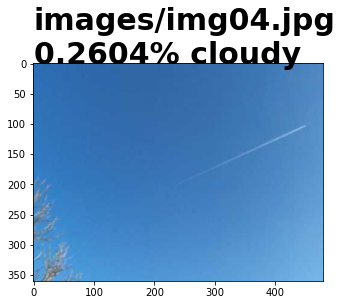

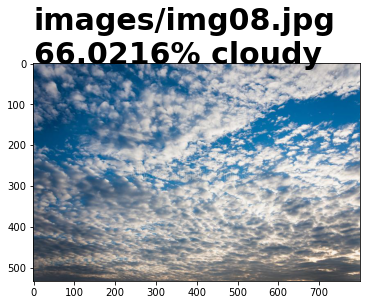

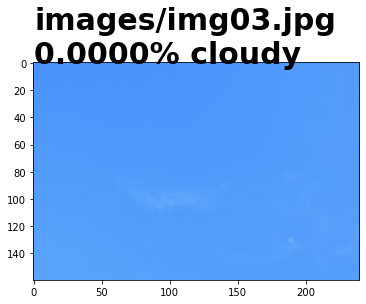

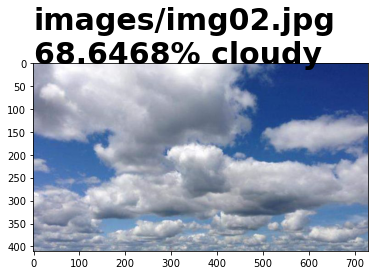

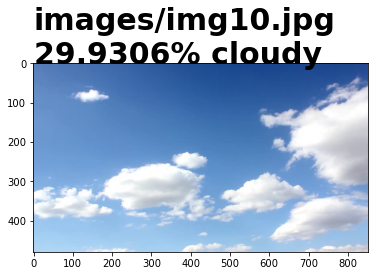

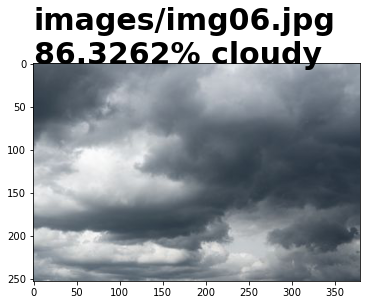

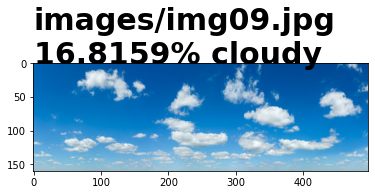

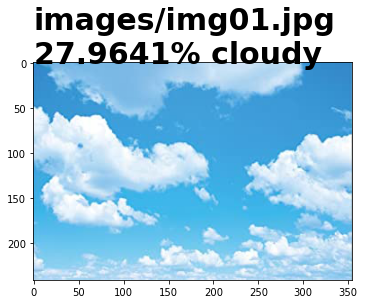

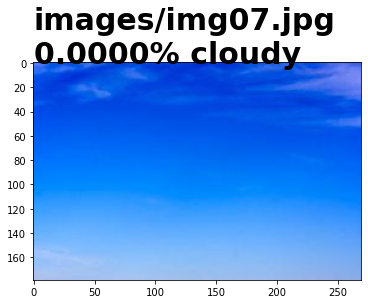

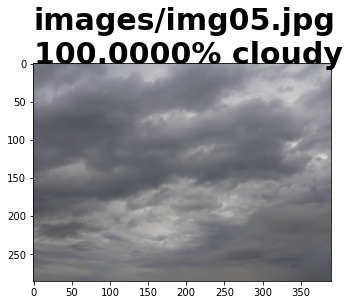

In [16]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for f in glob.glob("images/*.jpg"):
    plt.imshow(mpimg.imread(f))
    cloudiness = pct_cloudy(f, h_range=(180,240), s_range=(.25,1))
    plt.text(0, 0, f"{f}\n{cloudiness*100:.4f}% cloudy", color="black", fontdict={"fontsize":30, "fontweight":'bold', "ha":"left", "va":"baseline"})
    #Display the image
    plt.show()

### ANSWERS
* the naive detector is actually suprisingly accurate, especially on clear and cloudy days
* it looks pretty accurate on partly cloudy days, though more analysis is required
* the selected HSV make sense because blue is in the range 180 to 240 and should capture the vast majority of skies, and with digital camera variance as well as conditions, that range is broad enough to capture the general case, give the simplicity of the method which does well
* images with small stdevs are actually clear, which is supported in the evidence we have -- images with larger stdevs are variable cloudy, giving more support the the hypothesis that the stdev might be a good indicator of variable cloudy days

### (50%) Gain more practice with the Exploratory Data Analysis (EDA) and statistical functions in Pandas using WWII enlistment data 

No matter your position favorable, unfavorable or indifferent, the 
military generates a lot of data, most of which ordinary citizens
will never see.  One especially interest data that is often released
to the public are enlistment records, or the basic information about
those who enlisted into armed services.

The dataset we will explore in this part is from the 9 million
or so records from World War II of the enlisted men and women
of the US armed services from 1938 to 1946.  In these records
are a treasure trove of information, including names, ages
height, weight, race, marital status, education status
and other vital information of the enlisted.  

As a side note, this data was originally capture onto punch cards
(yes, the same type of punch cards that were used to program 
the first digital computers) and subsequently converted to 
digital form and accessioned into the US National Archives.

Some background on the data can be found from this source link:

* Electronic Army Serial Number Merged File, ca. 1938 - 1946 [https://catalog.archives.gov/id/1263923](https://catalog.archives.gov/id/1263923)

The file we will be working with is a fixed width file (FWF) meaning
that the number of characters per line is the same and
that ranges of columns indicate the data in the field.

For example, if you look at page 44 in the [file](https://catalog.archives.gov/OpaAPI/media/1263923/content/arcmedia/electronic-records/rg-064/asnf/100.1ND_NC.pdf?download=false)
you will notice that the layout of the file is given to you.  So 
for example, columns 9-32 are the full name of the enlisted
while columns 67-68 give the enlisted's year of birth. You will realize
this can be an efficient way to encode data when you have limited 
storage or memory resources, though the necessary mapping of fields
to their meaning cannot be lost, or the file may be difficult (or impossible) to
interpret later.  Luckily such mappings exist for this important
dataset.

An example of FWF data is given below (the first two rows were added to show the column numbers:

```
          1         2         3         4         5         6         7         8 
012345678901234567890123456789012345678901234567890123456789012345678901234567890 
17006058HANSON LUVERN J         770197745090840PVT 8FA 30 9   07718109996671451 02382.95 
36427840MARCILLE JOSEPH C       611436167260942PVT 8BI 00 5   06102127368671357 10815.143 
32853721LUSKY CHARLES R         230652390220343PVT 8NO 02 5   02324144331661277 05742.238 
```

For this assignment we're going to analyze some of the demographic data
including age, race, marital status and weight data.  We 
will also take a look at the enlistment dates and see if
the data match up with what was going on during that time in US history. 

I have prepared a random sample of the data (around 900K records)
since the full 9M records will put undue stress on the Hub
and such a sample is a good enough representation of the data. In doing
so, I have removed missing lines from the file, but that
is the extent of any filtering that was peformed.

This file can be found on Github in the same folder
as the [`hw1.ipynb`](https://github.com/kmsaumcis/mcis6273_f21_datamining/blob/main/homework/hw1/hw1.ipynb). You will use it to answer all questions
in this part of the assignment.

## Tools you'll need
You will need to load the fixed width file (FWF) in this 
assignment.

### `pandas.read_fwf()`
Use the [`read_fwf()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html) method to load the fixed width file.  I have 
made a method for doing this which reduces the amount
of time for you to figure out which columns apply
to which fields -- this required me to use the 
reference documents from the 1940s, which was tedious,
but thankfully such documentation existed even if 
it was a scan of a typewritten source!

### `Series.value_counts()` and `Series.sort_values()`
Both of these will be useful in getting the values
sorted for the questions below. Study both of these methods carefully.

### Data Cleaning Hints
The data set you will be using is not perfect as it was machine
translated and there are known issues in it.  For example, 
you may get information that may be out of specification,
for example, height is in inches, but if you look into it,
height data does have errors, as does weight (i.e. weights 
less than 100, heights greater than 90). Just remember data cleaning
is an important necessary step before proceeding.

&#167;  On September 16, 1940, The Selective Training and 
Service Act of 1940 was signed into law by President 
Franklin D. Roosevelt, which was the country's first peacetime 
draft designed to conscript troops in the event of war.
The timing of the Act was unique, since the US did not
enter World War II (WWII) until December 1941, but it 
nonetheless required
all male US citizens ages 21 to 35 to register for the draft
from which names were drawn through a lottery system.  Those
called to duty were to serve in the military
for one year.  From 1940 to 1947 nearly 10.1 million men and women
were inducted under the Act, the majority of which 
served in WWII stateside or abroad.

To warm up, we will take the enlistment column `enlistment_date`
and plot the data from our sample file.  

* Generate a bar plot of the enlistment numbers from 1939 to 1946. 
  The $x$-axis will contain the year (in ascending order) and the $y$-axis the 
  number enlisted.

* Does the sample data support the claim that the Act increased enlistment
  during WWII?

* What was the peak year of enlistment?  Is this supported by the
  entry of the US into WWII in December 1941.  Explain why or why not.

* What is the median age of those enlisted?  You may need to clean
  the data since there are unusual `birth_year` values that must be removed.

In [17]:
df = pd.read_fwf("asnef_900k_records.fin.dat", header=None,
            widths=[8,24,2,3,
                    4,6,4,1,
                    3,2,1,1,
                    3,1,2,2,
                    1,1,3,1,
                    2,3,1,1],
            names=['serial_number','name','res_state','res_county',
                   
                   'enlistment_place','enlistment_date','grade_alpha','grade_code',
                   
                   'branch_alpha','branch_code','empty_0','term',
                   
                   'longevity','source','nativity','birth_year',
                   
                   'race','education','occupation','marital_status',
                   
                   'height','weight','component','card_number'
                  ],
            dtype=str)

<AxesSubplot:>

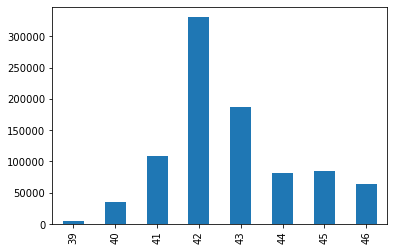

In [18]:
df.enlistment_date.str[-2:].astype(int).value_counts(sort=True)[:8].sort_index().plot(kind='bar')

### ANSWERS
* **peak year** 1942
* yes, this would be right after the Pearl Harbor bombing after which the US entered WWII and declared war against Japan


In [19]:
df.birth_year = df.birth_year.astype(int)

In [20]:
abs(42 - df.query('birth_year>70 or birth_year<24').birth_year).median()

24.0

### ANSWER
* **median age** = 24

<AxesSubplot:title={'center':'age density of wwii enlistees'}>

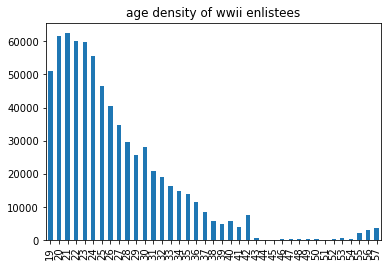

In [21]:
# I will allow for the answer to use 1942 as the year to compute the age as well as a more robust calculation
# using the entry year minus birth year as the calculation

abs(42 - df.query('birth_year>70 or birth_year<24').birth_year).value_counts().sort_index().plot(kind="bar", title="age density of wwii enlistees")

&#167;  During WWII large numbers of African-Americans entered the 
armed services, eventhough the US was still largely segregated
and the armed services maintained separate forces until after
WWII.  

* What was the percentage of African-Americans enlisted in 1941, 1942
  and 1943?

* The percentage of African Americans in 
  the general population was 9.8% in the 1940 census. 
  Compare that with the percentage enlisted 
  from 1941-43.  How do these percentages compare?

* Where were the top 5 states of residence (`res_state`) that African-Americans
  enlisted from?  You will need to look at this file: [https://catalog.archives.gov/OpaAPI/media/1263923/content/arcmedia/electronic-records/rg-064/asnf/100.1CL_SD.pdf?download=false](https://catalog.archives.gov/OpaAPI/media/1263923/content/arcmedia/electronic-records/rg-064/asnf/100.1CL_SD.pdf?download=false) and on page 3
  reference the state codes to determine the states.  You might first
  want to group the state codes first, then sort, take the top 5, 
  then match the code to the state -- this method will
  certainly save time.

In [22]:
df.race = df.race.astype(int, errors='ignore')

In [23]:
"""
build the race series, we will need
to make sure to drop non-numeric values
there could be a lot of variation here

FULL POINTS FOR DROPPING BAD VALUES
-0.25 POINTS FOR NOT
"""
sr_race = \
    pd.to_numeric( 
        df.race, 
        errors="coerce", 
        downcast="integer") \
       .dropna() 

In [24]:
sr_race.value_counts() / sr_race.size

1.0    0.851940
2.0    0.102088
8.0    0.008922
3.0    0.007775
4.0    0.007670
9.0    0.005987
0.0    0.004373
5.0    0.003985
6.0    0.003787
7.0    0.003473
Name: race, dtype: float64


### ANSWERS
* 10.2% african american enlisted 
    * no deduction of points for +/- 1% of that answer
    * -0.25 points for answers outside that threshold
* this is within a reasonable proportion of the general population of 9.8% (assuming an even distrubution on male/female)
    * the caveat here is the the proportion of men is overrepresented in the military, thus there is likely a disproportionately larger number of african american men when looking at the full african american population

In [25]:
df.query('race=="2"')

,serial_number,name,res_state,res_county,enlistment_place,enlistment_date,grade_alpha,grade_code,branch_alpha,branch_code,...,nativity,birth_year,race,education,occupation,marital_status,height,weight,component,card_number
43,34032880,DIBBLE ANDREW JR,46,013,4625,030441,PV0,8,BI,00,...,46,19,2,0,124,6,72,162,7,NaN
48,34534386,HARRIS EDWIN N,42,031,4213,061242,PVT,8,BI,00,...,41,16,2,7,993,7,67,130,7,NaN
56,34621904,SIMMONS BOOKER T,45,107,4545,090243,PVT,8,BI,00,...,45,23,2,0,306,6,68,135,7,NaN
62,33094808,CANNON SAM H,33,051,3386,110641,PVT,8,BI,00,...,33,16,2,0,753,6,71,189,7,NaN
84,15072266,ATKINS WILLIE S,53,153,5323,100146,PVT,8,CE,82,...,53,23,2,1,000,1,85,900,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899948,17175187,NORTON WILLIAM A,75,095,7325,011242,PVT,8,SC,90,...,07,52,2,1,410,5,27,014,8,3
899960,34998560,PERRY BUCK,46,185,4625,050744,PVT,8,NO,02,...,46,19,2,1,599,2,00,100,7,NaN
899967,34009144,SMITH LEROY,46,129,4625,300141,PVT,8,BI,00,...,46,19,2,2,583,6,68,123,7,NaN
899976,42102602,SIMS JOHN,22,013,2252,181243,PVT,8,NO,02,...,47,16,2,0,735,2,00,000,7,NaN


In [26]:
pd.to_numeric(
    df.query('race=="2"').res_state,
    errors="coerce")\
    .dropna() \
    .astype(int) \
    .value_counts()[:5]

45    6387
23    5693
85    5655
46    5039
43    4945
Name: res_state, dtype: int64

### ANSWERS
* looking at the data, top 5 states are 45, 23, 85, 46, 43
* going back to the PDF link gives us
    * **45**=mississippi
    * **23**=new york
    * **85**=texas
    * **46**=north carolina
    * **43**=georgia

&#167;  Age and marital status are vital bits of information which 
are tracked elsewhere (e.g. the Census), but the WWII military
enlistment data provides an ample (and unique) subset of the 
population to determine marital and age characterstics of 
US citizens.  It should be noted that this data does include
women, since for the first time in US military history, women
served in an offical capacity with their own
branches of service: Women's Army Auxiliary Corps (WAC), Women
Airforce Service Pilots (WASP) and the Women Accepted for 
Volunteer Emergency Services (WAVES).

For the sake of trying to understand marital status, we
will use the `component` field to restrict to _men_ and
_women's_ marital status.  When the `component` is 7 
it refers to enlisted men.  You can find the complete reference
for these values on page 306 in [this document](https://catalog.archives.gov/OpaAPI/media/1263923/content/arcmedia/electronic-records/rg-064/asnf/100.1CL_SD.pdf?download=false).
You will want to use `branch_alpha=="WAC"` to filter for women, indicating
the Women's Army Auxiliary Corps.

Use the data to answer the following questions:

* What percentage of the enlisted where older than 30?  You may
  need to filter the data to eliminate spurious data -- there are
  some values which are not correct!
* What are the percentages of single (without depedents) and married men enlisted?  The `marital_status` field will be `6` for 
  _single (without dependents)_ and `1` for _married_. 
* What is the median age of a single man?
* What are the percentages of married women in the WAC?  
  

In [27]:
abs(42 - df.query('birth_year>70 or birth_year<12').birth_year).value_counts().sort_index()

29      360
30      945
31    20785
32    19108
33    16198
34    14751
35    13818
36    11350
37     8530
38     5608
39     4960
40     5722
41     3871
42     7587
43      518
44       79
45       82
46      454
47      308
48      311
49      181
50      337
51      146
52      212
53      489
54      310
55     1987
56     3130
57     3530
Name: birth_year, dtype: int64

In [28]:
abs(42 - df.query('birth_year>70 or birth_year<12').birth_year).value_counts().sort_index().sum()

145667

In [29]:
abs(42 - df.query('birth_year>70 or birth_year<24').birth_year).value_counts().sort_index().sum()

699737

In [30]:
145667 / 699737

0.20817392820445396

In [31]:
df.query('marital_status=="2"').marital_status.size / \
df.marital_status.size

0.2384411111111111

In [32]:
df.query('marital_status=="6"').marital_status.size / \
df.marital_status.size

0.5926955555555555

In [33]:
abs(42-df.query('marital_status=="2"').birth_year).median()

26.0

In [34]:
df.query('branch_alpha=="WAC" and marital_status=="2"').marital_status.size / \
df.query('branch_alpha=="WAC"').marital_status.size

0.2956112852664577

&#167;  Education of service personnel varied quite a bit, and some
claim that less educated people are more eager to accept
entry into the service, especially when skilled labor 
is associated with education level.  The draft was presumed
to be random -- no one was to receive a preference into the service.
Furthermore, more education is often associated with a 
deeper understanding of the social, economic and political impacts
of war, and often those with college and graduate degrees would refuse 
to enter the service as _conscientious objectors_.

Interestingly, the Selective Service Act of 1940 did provision for
_conscientious objectors_ -- those who for religious or
philosophical reasons did not want to take up arms and 
be confronted with having to kill another human being.  Such 
people were still
forced into service (or jailed if they refused), but 
they were given non-combat duty
and often were not eligible for veterans benefits once discharged.

In the 1940 census the percent of the population age 25 and older
with [a college degree (or higher)](https://www.census.gov/data/tables/time-series/demo/educational-attainment/cps-historical-time-series.html) was around 4.6% for all
races and all genders.  The GI Bill was a benefit given to veterans
to encourage [pursuing and competing a college degree](https://clear.dol.gov/Study/Going-war-and-going-college-Did-World-War-II-and-GI-Bill-increase-educational-attainment-0),
which contributed to the general rise of college degrees through the 50s and 60s.



We will answer the following questions using the educational
attainment data in the `education` field of the data. 

The information on which fields map to which education level
are on page 305 of [this document](https://catalog.archives.gov/OpaAPI/media/1263923/content/arcmedia/electronic-records/rg-064/asnf/100.1CL_SD.pdf?download=false).
HINT: 4 years of college is code `8` and 4 years of high school 
(grade 9 through 12) is code `4`.

* What percentage of the enlisted people 25 or older in this data
  held college degrees (4 years of college)?

* How does that compare to the national average from the Census
  data discussed above?  Does this support the claim that the 
  draft was disproportionated favorable to the college educated 
  during WWII? Why or why not? 

* What percentage only had grammar school (code `0`) education -- you 
  can use all ages?

In [35]:
abs(42 - df.query('birth_year>70 or birth_year<17 and education=="8"').birth_year).value_counts().sort_index().sum() / \
abs(42 - df.query('birth_year>70 or birth_year<24').birth_year).value_counts().sort_index().sum() 

0.04188573706978479

In [36]:
abs(42 - df.query('birth_year>70 or birth_year<24 and education=="0"').birth_year).value_counts().sort_index().sum()  / \
abs(42 - df.query('birth_year>70 or birth_year<24').birth_year).value_counts().sort_index().sum() 

0.3407808933928033

&#167;  These last questions will deal with perhaps the dirtiest part of the dataset and will truly be exploratory, but we may be able to get at some interesting relationships while reserving strong judgement.
Most of the people enlisted represented average healthy adults in the general population, but also those enlisted must adhere to basic physical standards as set by the service. This remains true today (though the standards have changed over time) since basic physical conditioning and evaluation is required to enter the service, so that serious medical conditions do not present issues for basic perfomance of combat duties.  We are going to find out what the weight characteristics are of those entering the service in WWII.

* Clean the data, and restrict values only to those that make sense -- for example, no one born before 1890 (age 50) and born after 1923 (age 18).
* What is the median weight of those age 19-23?  Compare the median weight in 19-23 to the mean for the same age range. What are the differences? How does the standard deviation help interpret answer?
* Plot a line plot of age to median weight and weight standard deviation. Age will be on the $x$-axis, weight on the left $y$-axis and weight standard deviation on the right $y$-axis? Your plot will have two lines -- one with the standard deviation, the other with the weight.

### ANSWERS

* the answer can optionally include a new dataframe with age for easier calculation
* **median weight for 19-23** = 142 
  * FULL points for answers in the range 138 - 147
  * -1 point for outside that range

In [37]:
"""
 OPTIONAL USE OF AGE COLUMN FOR EASY COMPUTATION
 
 ANSWER MUST INCLUDE SOME FILTERING ON BIRTH YEAR
 -1 POINT FOR NO FILTER OF DATA
 -0.5 POINT FOR NO FILTER OF WEIGHT
 -0.5 POINT FOR NO FILTER OF BIRTH YEAR
"""
df_weight = df.query('birth_year>90 or birth_year<24').loc[:,['birth_year','weight']]
df_weight.weight = pd.to_numeric(df_weight.weight)
df_weight = df_weight.query('weight>70 and weight<300')
df_weight['age'] = abs(42 - df_weight.birth_year)
df_weight

,birth_year,weight,age
3,18,145,24
4,2,135,40
6,21,159,21
7,16,139,26
8,8,156,34
...,...,...,...
899994,12,132,30
899995,11,148,31
899997,16,191,26
899998,19,142,23


In [38]:
# MEDIAN WEIGHT => 50%
df_weight.query('age>18 and age<24').describe()

,birth_year,weight,age
count,230026.000000,230026.000000,230026.000000
mean,20.889939,143.370636,21.110061
std,1.372908,25.727195,1.372908
min,19.000000,71.000000,19.000000
25%,20.000000,129.000000,20.000000
50%,21.000000,142.000000,21.000000
75%,22.000000,157.000000,22.000000
max,23.000000,299.000000,23.000000


In [39]:
# THIS IS THE DATAFRAME FOR ALL AGES WEIGHT ONLY, WITH KEY DESCRIPTIVE STATISTICS
df_weight.groupby('age').describe()['weight']

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
19,36853.0,134.939327,29.586689,71.0,117.0,136.0,151.00,299.0
20,46309.0,142.992896,25.730252,71.0,129.0,142.0,155.00,299.0
21,50183.0,144.659586,24.360853,71.0,130.0,143.0,157.00,299.0
22,48030.0,145.766250,24.272442,71.0,132.0,144.0,158.00,299.0
23,48651.0,146.422314,23.912438,71.0,132.0,145.0,159.00,299.0
24,44209.0,147.300798,24.821073,71.0,133.0,146.0,160.00,299.0
25,36393.0,147.791141,25.355303,71.0,133.0,146.0,161.00,299.0
26,30974.0,147.900465,26.451474,71.0,132.0,147.0,162.00,299.0
27,26096.0,147.905349,26.785571,71.0,132.0,147.0,162.00,299.0


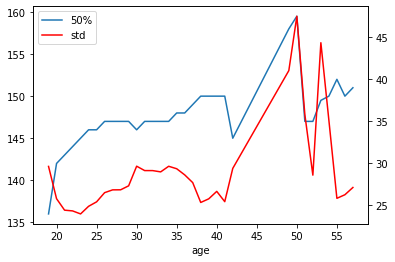

In [40]:
"""
 THE PLOT CAN BE DONE A NUMBER OF WAYS -- IT SHOULD LOOK SOMETHING LIKE THIS
 FULL POINTS GIVEN IF THE DATA LOOKS SIMILAR -- THE LEFT Y AXIS MUST BE SOMEWHERE IN THE RANGE 120-170,
 THE RIGHT Y AXIS BETWEEN 20-60

 -0.5 points for no right axis
 -0.5 point for left axis not being in the range 120-170
 -2 points for no graph at all
"""
ax = df_weight.groupby('age').describe()['weight'][['50%']].plot()

ax_right = ax.twinx()
ax_right.spines['right'].set_position(('axes', 1.0))
df_weight.groupby('age').describe()['weight'][['std']].plot(ax=ax_right, color='red', legend=None)

# Proper legend position
line1, label1 = ax.get_legend_handles_labels()
line2, label2 = ax_right.get_legend_handles_labels()

ax.legend(line1+line2, label1+label2, loc=2)

$\Xi$